In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)
print(sns.__version__)

1.3.4
0.11.2


In [6]:
%matplotlib inline
# Set kích thước mặc định cho các biểu đồ Seaborn
sns.set(rc={'figure.figsize':(7, 5)})

#sns.set(style="ticks", color_codes=True)

# 0. Load dữ liệu và kiểm tra sơ bộ thông tin

In [8]:
# Load dữ liệu từ file và chọn các cột cần dùng

#cols = ['origin', 'dep_delay', 'arr_delay', 'carrier', 'distance', 'air_time']
#fdata = pd.read_csv('flight-data/nycflights.csv', usecols=cols)
fdata = pd.read_csv('flight-data/nycflights.csv', index_col=0)
fdata.drop(['dep_time','tailnum', 'arr_time', 'flight'], inplace=True, axis=1)
fdata.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,minute
1,2013,1,1,2.0,11.0,UA,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,4.0,20.0,UA,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,2.0,33.0,AA,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,-1.0,-18.0,B6,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,-6.0,-25.0,DL,LGA,ATL,116.0,762,5.0,54.0


**Loại bỏ tất cả các dòng có xuất hiện bất cứ NaN nào**

In [9]:
# Loại bỏ tất cả các dòng có NaN
# Lưu ý: nếu chọn axis=1 sẽ bỏ các cột có NaN
fdata.dropna(inplace=True, axis=0, how="any")
fdata.reset_index(inplace=True, drop=True)
fdata

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,minute
0,2013,1,1,2.0,11.0,UA,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,4.0,20.0,UA,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,2.0,33.0,AA,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,-1.0,-18.0,B6,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,-6.0,-25.0,DL,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
327341,2013,9,30,-5.0,-17.0,B6,JFK,SYR,41.0,209,22.0,40.0
327342,2013,9,30,-10.0,-20.0,B6,JFK,BUF,52.0,301,22.0,40.0
327343,2013,9,30,-5.0,-16.0,B6,JFK,ROC,47.0,264,22.0,41.0
327344,2013,9,30,12.0,1.0,B6,JFK,BOS,33.0,187,23.0,7.0


In [10]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_delay  327346 non-null  float64
 4   arr_delay  327346 non-null  float64
 5   carrier    327346 non-null  object 
 6   origin     327346 non-null  object 
 7   dest       327346 non-null  object 
 8   air_time   327346 non-null  float64
 9   distance   327346 non-null  int64  
 10  hour       327346 non-null  float64
 11  minute     327346 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 30.0+ MB


# FacetGrid

## 1. Phân tích về các chuyến bay trễ (delay) và không-trễ (not-delay) theo các sân bay

In [11]:
# Tạo thêm cột mới xác định 1 chuyến bay là xuất phát trễ hay không
fdata['dep_delay2'] = fdata['dep_delay'] > 0
fdata.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,dep_delay2
0,2013,1,1,2.0,11.0,UA,EWR,IAH,227.0,1400,5.0,17.0,True
1,2013,1,1,4.0,20.0,UA,LGA,IAH,227.0,1416,5.0,33.0,True
2,2013,1,1,2.0,33.0,AA,JFK,MIA,160.0,1089,5.0,42.0,True
3,2013,1,1,-1.0,-18.0,B6,JFK,BQN,183.0,1576,5.0,44.0,False
4,2013,1,1,-6.0,-25.0,DL,LGA,ATL,116.0,762,5.0,54.0,False


**Chia ra 2 tập: `delay` và `không delay`**

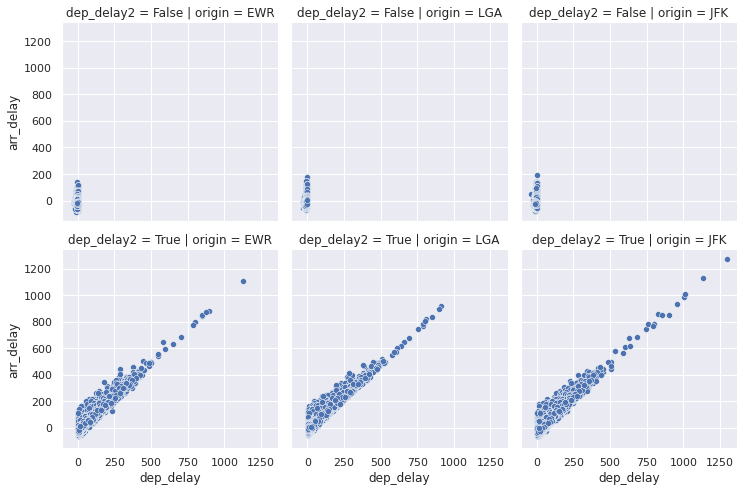

In [14]:
# Kiểm tra tương quan giữa xuất phát trễ và đến nơi trễ
bieudo1 = sns.FacetGrid(fdata, col='origin', row='dep_delay2', height=3.5)
bieudo1.map(sns.scatterplot, 'dep_delay', 'arr_delay')

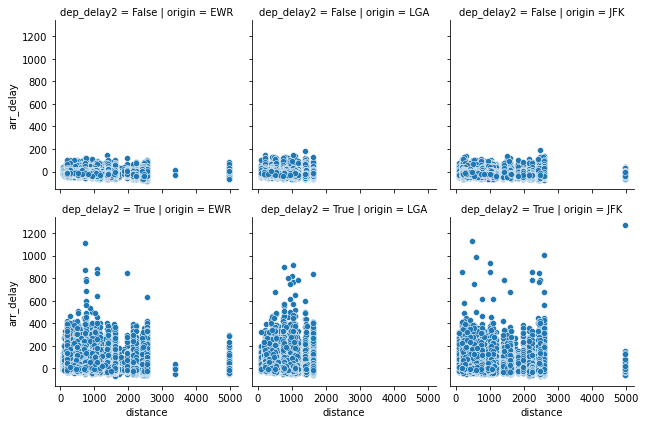

In [18]:
# Kiểm tra tương quan giữa khoảng cách và đến nơi trễ
bieudo1 = sns.FacetGrid(fdata, col='origin', row='dep_delay2')
bieudo1.map(sns.scatterplot, 'distance', 'arr_delay')

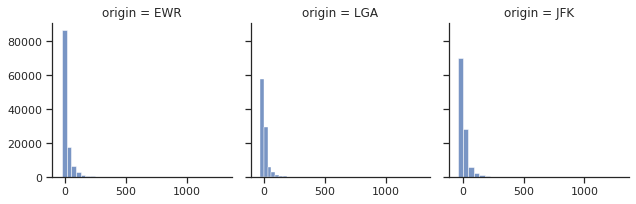

In [264]:
# Kiểm tra phân bố về thời gian trễ ở các sân bay
bieudo2 = sns.FacetGrid(fdata, col='origin')
bieudo2.map_dataframe(sns.histplot, x='dep_delay', bins=30)

**So sánh số lượng chuyến bay trễ và không trễ của 3 sân bay**

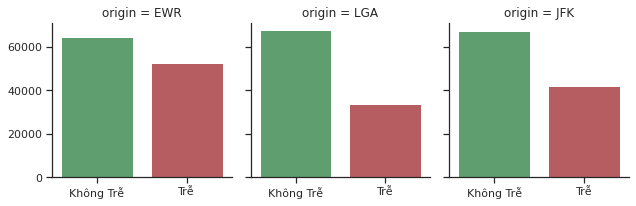

In [265]:
bieudo3 = sns.FacetGrid(fdata, col='origin')
bieudo3.map_dataframe(sns.countplot, x='dep_delay2', hue='dep_delay2',
                      palette=['g','r'],
                      dodge=False)
#bieudo3.set(xticks = [-0.2,1.2])
bieudo3.set_xticklabels(['Không Trễ', 'Trễ'])

## 2. Phân tích tình trạng trễ chuyến theo buổi trong ngày ở các sân bay

In [15]:
# Thêm cột dữ liệu 'tod' theo 3 buổi: Sáng, Chiều, Tối
# tod: time of day (Morning, Afternoon, Evening)
tod = pd.Series(['Tối'] * fdata['hour'].size)
tod[fdata['hour'] < 12] = 'Sáng'
tod[(12 <= fdata['hour']) & (fdata['hour'] <18)] = "Chiều"
fdata['tod'] = tod
fdata.drop(['hour','minute'], inplace=True, axis=1)
fdata.sample(5)

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,dep_delay2,tod
181284,2013,4,23,71.0,68.0,B6,JFK,CHS,94.0,636,True,Chiều
281669,2013,8,11,-2.0,-5.0,UA,EWR,CLE,61.0,404,False,Tối
305403,2013,9,6,0.0,-50.0,B6,JFK,SFO,316.0,2586,False,Chiều
25681,2013,1,31,1.0,7.0,UA,EWR,SJU,194.0,1608,True,Sáng
145170,2013,3,15,1.0,-19.0,VX,JFK,SFO,356.0,2586,True,Sáng


**Chia ra theo buổi của mỗi sân bay**

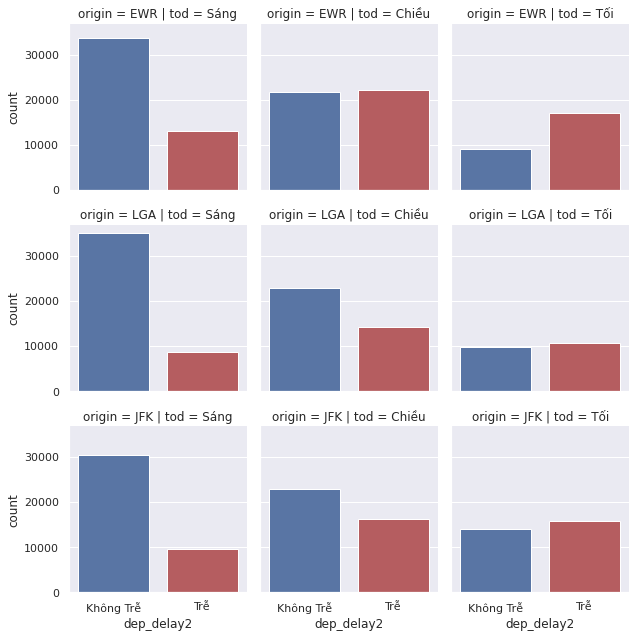

In [18]:
bieudo4 = sns.FacetGrid(fdata, col='tod', row='origin')
bieudo4.map_dataframe(sns.countplot, x='dep_delay2', 
                      palette=["b", "r"],
                      hue='dep_delay2', dodge=False)
bieudo4.set(xticks = [0, 1], xticklabels=['Không Trễ', 'Trễ'])
#bieudo4.set_xticklabels(['Không Trễ', 'Trễ'])

## 3. Phân tích tình trạng trễ chuyến theo ngày trong tuần ở các sân bay

In [28]:
dow = ['Monday', 'Tuesday', 'Wednesday', 
       'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
# Thêm cột dữ liệu 'dow' (day of week)
fdata['dow'] = pd.to_datetime(fdata[['year', 'month', 'day']]).dt.day_name()
fdata.drop(['year', 'month', 'day'], inplace=True, axis=1)
fdata.sample(5)

**Vẽ biểu đồ số chuyến bay trễ và không trễ ở mỗi sân bay theo ngày trong tuần**

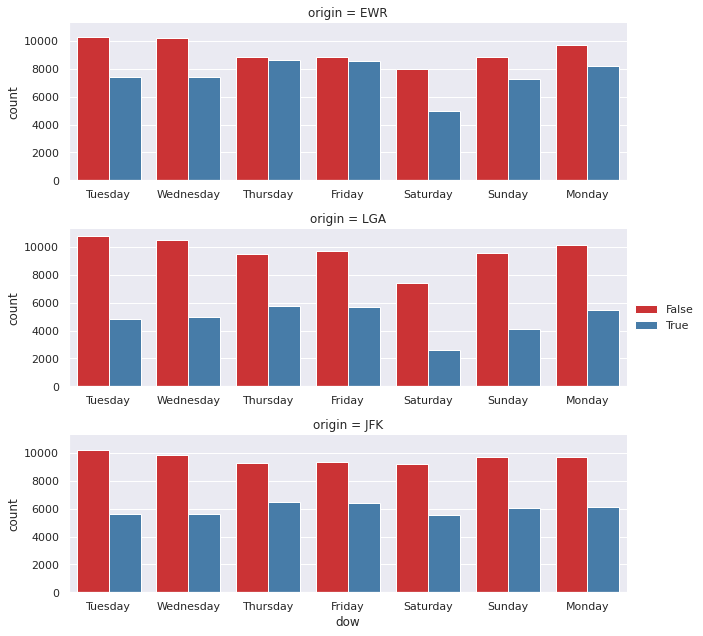

In [47]:
bieudo5 = sns.FacetGrid(fdata, row='origin',
                        sharex=False, sharey=True,
                        height=3, aspect=3, 
                        #gridspec_kws={"hspace":0.4},
                       )
bieudo5.map_dataframe(sns.countplot, x='dow', 
                      # order='dow', 
                      hue='dep_delay2', 
                      palette='Set1'
                     )
bieudo5.add_legend()

**Vẽ biểu đồ số chuyến bay trễ ở mỗi sân bay theo ngày trong tuần**

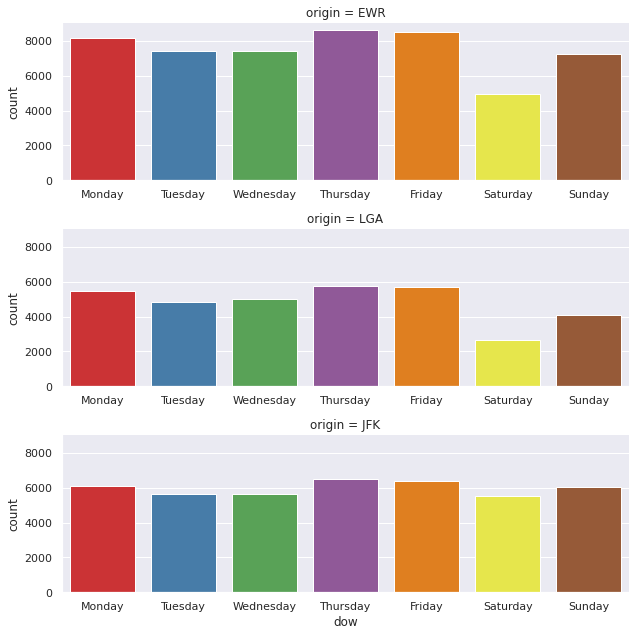

In [36]:
bieudo5 = sns.FacetGrid(fdata[fdata['dep_delay2']==True], 
                        row='origin', #hue='dep_delay2',
                        sharex=False, sharey=True,
                        height=3, aspect=3, 
                        #gridspec_kws={"hspace":0.4},
                       )
bieudo5.map_dataframe(sns.countplot, x='dow', #hue='dep_delay2', 
                      order=dow,
                      palette='Set1', 
                      dodge=False)


**Kiểm tra lại với sân bay EWR**

In [37]:
test = fdata.loc[fdata['origin'] == 'EWR'][['dep_delay2','dow']]
test_count = test.groupby('dow')['dep_delay2'].value_counts()
test_count.name = 'count'
test_count

dow        dep_delay2
Friday     False          8851
           True           8532
Monday     False          9694
           True           8173
Saturday   False          7980
           True           4976
Sunday     False          8842
           True           7250
Thursday   False          8831
           True           8618
Tuesday    False         10299
           True           7438
Wednesday  False         10216
           True           7427
Name: count, dtype: int64

In [38]:
test_count.unstack().reindex(dow)

dep_delay2,False,True
dow,,
Monday,9694,8173
Tuesday,10299,7438
Wednesday,10216,7427
Thursday,8831,8618
Friday,8851,8532
Saturday,7980,4976
Sunday,8842,7250


In [39]:
print(type(test_count))
test_count = test_count.reset_index()
test_count

<class 'pandas.core.series.Series'>


,dow,dep_delay2,count
0,Friday,False,8851
1,Friday,True,8532
2,Monday,False,9694
3,Monday,True,8173
4,Saturday,False,7980
5,Saturday,True,4976
6,Sunday,False,8842
7,Sunday,True,7250
8,Thursday,False,8831
9,Thursday,True,8618


<AxesSubplot:xlabel='dow', ylabel='count'>

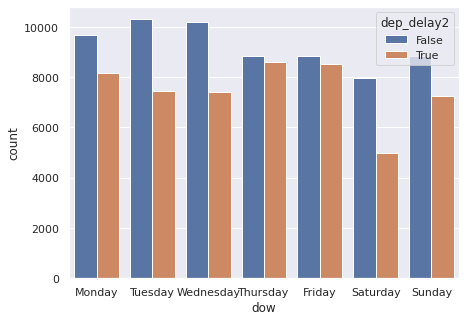

In [49]:
sns.barplot(data=test_count, x='dow', y='count', 
            hue='dep_delay2', order=dow)

# PairGrid

In [249]:
fdata.sample(5)

,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,dep_delay2,tod,dow
254137,-5.0,-36.0,DL,JFK,LAX,290.0,2475,False,Sáng,Saturday
240449,7.0,-5.0,B6,JFK,JAX,117.0,828,True,Chiều,Thursday
71417,-2.0,-9.0,B6,JFK,SJU,200.0,1598,False,Sáng,Tuesday
286538,21.0,-29.0,DL,JFK,LAS,287.0,2248,True,Tối,Friday
251838,-2.0,90.0,DL,LGA,MSY,165.0,1183,False,Tối,Wednesday


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


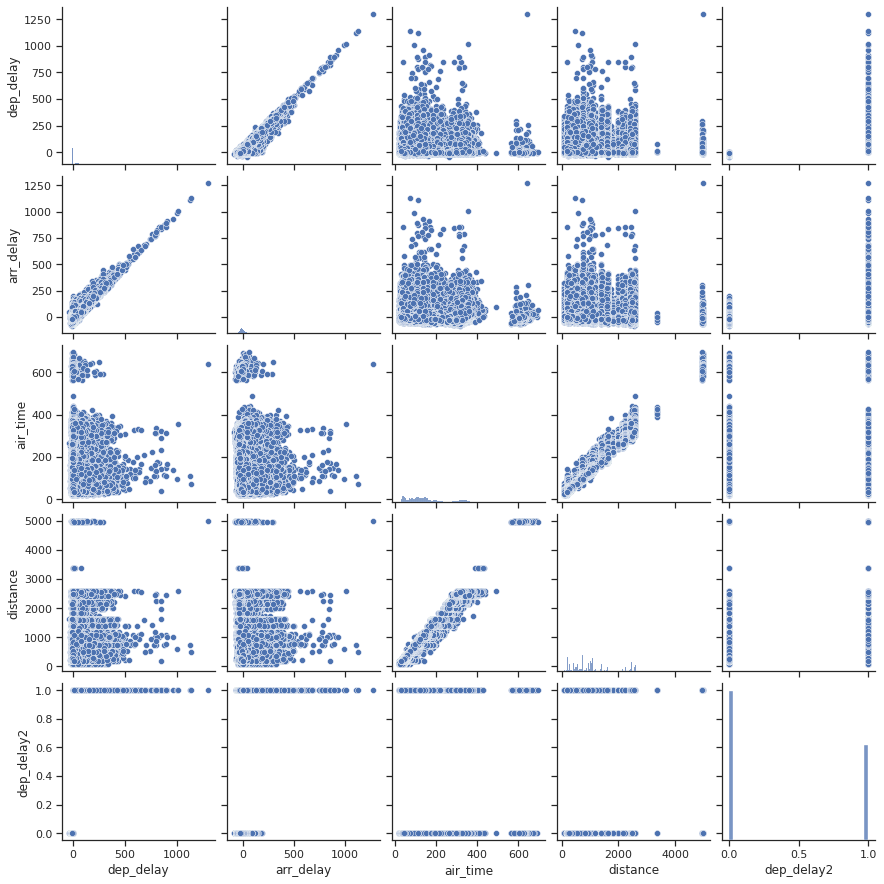

In [250]:
# LƯU Ý: CẦN THẬN TRỌNG KHI VẼ PAIRPLOT CHO TOÀN BỘ DATAFRAME!!!
# ============ VỚI DỮ LIỆU LỚN CÓ THỂ TREO MÁY ============
sns.pairplot(fdata)

(0.0, 50.0)

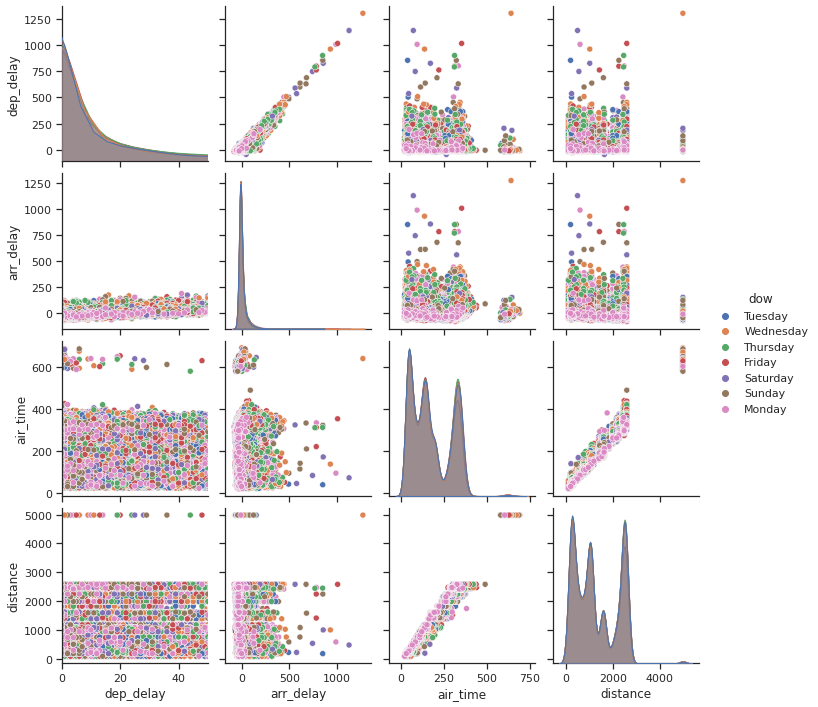

In [259]:
# Ví dụ: Thực hiện với chỉ sân bay JFK
fdata2 = fdata[fdata['origin'] == 'JFK']
bieudo = sns.pairplot(fdata2, 
                      vars=['dep_delay', 'arr_delay', 'air_time', 'distance'], 
                      hue='dow')
bieudo.axes[0,0].set_xlim([0,50])

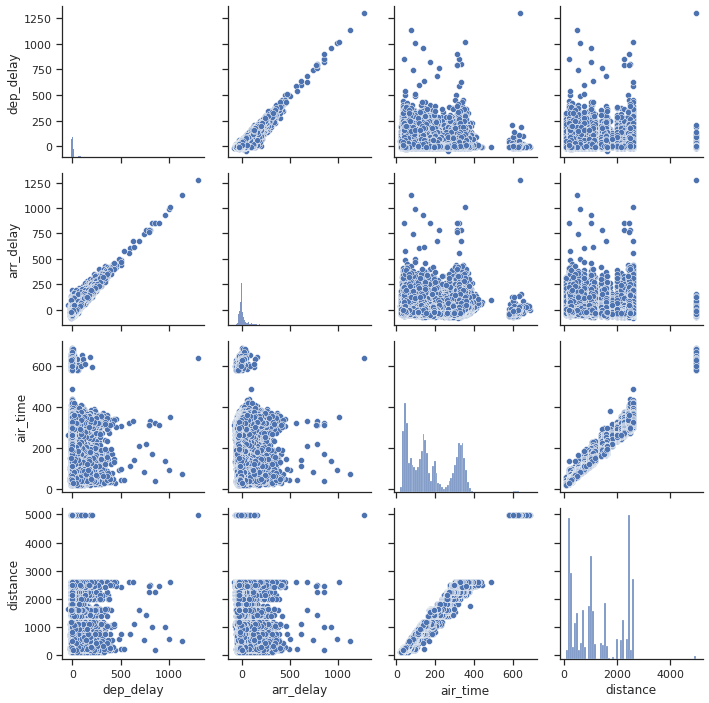

In [262]:
grid1 = sns.PairGrid(fdata2[['dep_delay', 'arr_delay', 'air_time', 'distance']])
grid1.map_offdiag(sns.scatterplot)
grid1.map_diag(sns.histplot)